First of all we import all libraries that are going to be used in this preprocessing study.

In [38]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [39]:
data = []
file = open("./dataset/seismic-bumps.arff", "r")
read=False
for line in file:
    if read:
        data.append(line.strip().split(","))
    if "@data" in line and not read:
        read=True
data

[['a',
  'a',
  'N',
  '15180',
  '48',
  '-72',
  '-72',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'N',
  '14720',
  '33',
  '-70',
  '-79',
  'a',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '2000',
  '2000',
  '0'],
 ['a',
  'a',
  'N',
  '8050',
  '30',
  '-81',
  '-78',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'N',
  '28820',
  '171',
  '-23',
  '40',
  'a',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '3000',
  '3000',
  '0'],
 ['a',
  'a',
  'N',
  '12640',
  '57',
  '-63',
  '-52',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'W',
  '63760',
  '195',
  '-73',
  '-65',
  'a',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['a',
  'a',
  'W',
  '207930',
  '614',
  '-6',
  '18',
  'a',
  '2',
  '2',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1000',

Now we have the dataset as string format. Still a couple of things to do, first of all we can see in the dataset description that there are no missing values to process. Then the next thing to think about is how could we change the string values that are not a number to numbers so they can be interpreted by the algorithms.

If we check the dataset we can see that the features 1,2,3 and 8 are categorical and the last feature is the class itself that means that there is a seismic bump aka earthquake in the next danger period coming. So for those features that are not the class we know that takes the following values:

| Feature | Range of values |
| ------- | --------------- |
|    1    |    {a,b,c,d}    |
|    2    |    {a,b,c,d}    |
|    3    |      {W,N}      |
|    8    |    {a,b,c,d}    |
|  class  |      {1,0}      |

Nice, lets do this, for out purposes $W=0$, $N=1$ and $\{a,b,c,d\} = \{1,2,3,4\}$

In [40]:
numerical_values = {"W": 0, "N": 1, "a": 1, "b": 2, "c": 3, "d": 4}
for row in data:
    row[0] = numerical_values[row[0]]
    row[1] = numerical_values[row[1]]
    row[2] = numerical_values[row[2]]
    row[7] = numerical_values[row[7]]
data

[[1,
  1,
  1,
  '15180',
  '48',
  '-72',
  '-72',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  1,
  '14720',
  '33',
  '-70',
  '-79',
  1,
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '2000',
  '2000',
  '0'],
 [1,
  1,
  1,
  '8050',
  '30',
  '-81',
  '-78',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  1,
  '28820',
  '171',
  '-23',
  '40',
  1,
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '3000',
  '3000',
  '0'],
 [1,
  1,
  1,
  '12640',
  '57',
  '-63',
  '-52',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  0,
  '63760',
  '195',
  '-73',
  '-65',
  1,
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 [1,
  1,
  0,
  '207930',
  '614',
  '-6',
  '18',
  1,
  '2',
  '2',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1000',
  '700',
  '0'],
 [1,
  1,
  1,
  '48990',
  '194',
  '

Now we are going to pass all values to float and take as well the labels apart.

In [41]:
for i in range(len(data)):
    new_row = []
    for j in range(len(data[0])):
        new_row.append(float(data[i][j]))
    data[i] = new_row
data = np.array(data)
labels = data[:,-1]

As a first approach to visualizing the dataset we are going to apply TSNE reduction to two components so we can see a projection of the data in $\mathbb{R}^2$

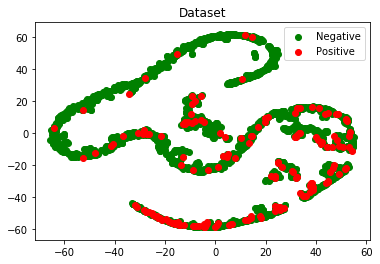

In [42]:
dataset_reduced = TSNE(n_components=2).fit_transform(data)
neg = np.array([dataset_reduced[i] for i in range(len(dataset_reduced)) if labels[i]==0])
pos = np.array([dataset_reduced[i] for i in range(len(dataset_reduced)) if labels[i]==1])
plt.scatter(neg[:,0], neg[:,1], c="green", label="Negative")
plt.scatter(pos[:,0], pos[:,1], c="red", label="Positive")
plt.legend()
plt.title("Dataset")
plt.show()

Another problem to issue is the fact that the classes are imbalanced. Lets check this out.

In [44]:
neg = 0
pos = 0
for l in labels:
    if l==0:
        neg+=1
    else:
        pos+=1
print("Hay un " + str(pos/(neg+pos)) + "% de positivas y un " + str(neg/(neg+pos)) + "% negativas.")

Hay un 0.06578947368421052% de positivas y un 0.9342105263157895% negativas.
